In [1]:
%load_ext autoreload
%autoreload 2


# Master Pipeline for Retail Data Processing

## Overview
This notebook implements a **master pipeline** that processes raw retail transaction data (`df_a_raw`) into a log-transformed RFM (Recency, Frequency, Monetary) dataframe, ready for scaling and K-Means clustering. The pipeline automates data cleaning, based on the guidelines seen in [data information](https://archive.ics.uci.edu/dataset/502/online+retail+ii), feature engineering based on RFM framework, RFM computation, and logarithmic transformation, reducing manual steps and ensuring reproducibility, for similar datasets. 

## Pipeline Steps (in Order)
The pipeline (`master_pipeline_to_log_rfm`) executes the following steps sequentially:
1. **Data Cleaning**: Applies `cleaning_pipeline` to normalize columns, filter invalid invoices/stockcodes, remove duplicates/NaNs, and drop zero prices.
2. **Feature Engineering**: Encodes country (mean encoding), converts `customer_id` to int, and adds `sale_total` (quantity * price).
3. **RFM Computation**: Aggregates data by `customer_id` to create RFM features: `recency_days`, `frequency`, `sale_value`.
4. **Logarithmic Transformation**: Applies log to `frequency` and `sale_value` to handle skewness/outliers, adding `frequency_log` and `sale_value_log`.
5. **Indexing**: Sets `customer_id` as the index for easier scaling.

**Output**: A dataframe with columns `customer_id` (index), `recency_days`, `frequency_log`, `sale_value_log`—ready for `apply_standard_scaling` and K-Means.

## How to Start the Pipeline
1. **Load Data**: Ensure `df_a_raw` is loaded (e.g., `df_a_raw = pd.read_pickle('df_2010-2011.pkl')`).
2. **Run the Pipeline**: Call the function in a code cell:
   ```python
   df_log = master_pipeline_to_log_rfm(df_a_raw)
   ```

# Imports

In [9]:
import sys
import os
sys.path.append(os.path.abspath(".."))
from src.functions import *
from src.pipeline import *


In [10]:
load_pkl_to_dataframe(var_name='df');


FileUpload(value=(), accept='.pkl', description='Upload PKL')

In [12]:
df_loaded = load_pkl_to_dataframe.df


# Pipeline start

'Starting Master Pipeline: Raw Data → RFM Features → Log Transformed → Scaled'

'Input data shape: (541910, 8)'

'Starting data cleaning pipeline'

'Input shape: (541910, 8)'

'Column names normalized'

'Shape: (541910, 8)'

"'invoice' converted to string type"

'Data type: object'

"Filtered 9288 rows where 'invoice' starts with 'C'"

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


'Found 3 unique prefixes'

"Results for prefix: 'C'"

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


"Results for prefix: 'A'"

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


"'stockcode' converted to string type"

'Data type: object'

'33 abnormal values:'

['POST',
 'D',
 'C2',
 'DOT',
 'M',
 'BANK CHARGES',
 'S',
 'AMAZONFEE',
 'DCGS0076',
 'DCGS0003',
 'gift_0001_40',
 'DCGS0070',
 'm',
 'gift_0001_50',
 'gift_0001_30',
 'gift_0001_20',
 'DCGS0055',
 'DCGS0072',
 'DCGS0074',
 'DCGS0069',
 'DCGS0057',
 'DCGSSBOY',
 'DCGSSGIRL',
 'gift_0001_10',
 'PADS',
 'DCGS0004',
 'DCGS0073',
 'DCGS0071',
 'DCGS0066P',
 'DCGS0068',
 'DCGS0067',
 'B',
 'CRUK']

'Filtered 532619 rows, dropped 9291 entries not matching 6 consecutive digits'

"Removed 2409 rows where 'stockcode' was in the exclusion list."

'Shape after exclusion: (530210, 8)'

'Removed 133840 rows with missing customer IDs'

'Found 5187 duplicated rows'

'Sample duplicated rows (sorted):'

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom


'Dropped 5187 duplicate rows'

'Found 33 rows with price equal to 0:'

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom


'Removed 33 rows with price equal to 0'

'Final cleaned shape: (391150, 8)'

'Cleaning pipeline complete. Final shape: (391150, 8)'

'Starting feature engineering pipeline'

'Input shape: (391150, 8)'

"Encoded 'country' with 37 unique categories"

"'customer_id' converted to int32"

'Actual dtype: int32'

"Created 'sale_total' as product of 'price' and 'quantity'"

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country_encoded,sale_total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,0.891914,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,0.891914,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,0.891914,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,0.891914,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,0.891914,20.34


'Feature engineering complete. Final shape: (391150, 9)'

'Computed RFM features for 4334 customers'

'Applied log transformation to 2 column(s)'

"Set 'customer_id' as index. Final shape: (4334, 3)"

'Final datasets ready: df_log shape (4334, 3), df_scaled shape (4334, 3)'

Calculating Inertia for K values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


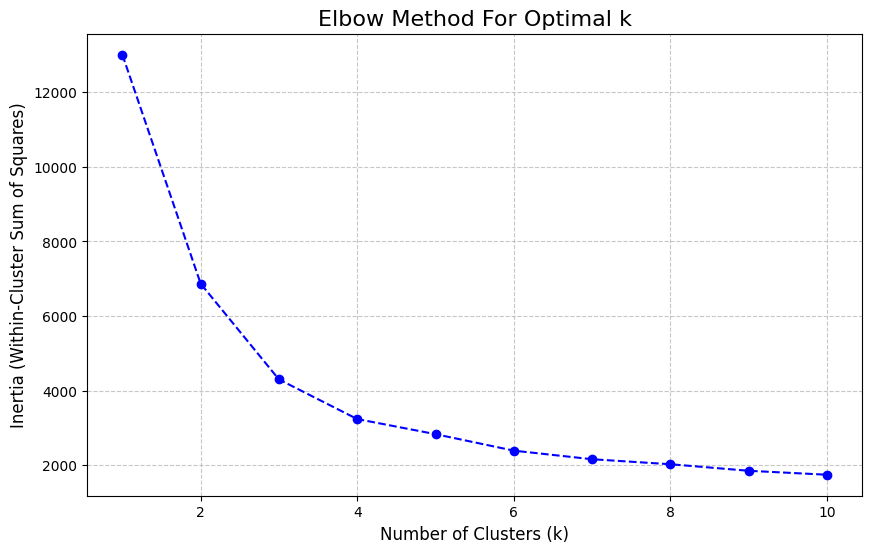

Model fitted.
Applying PCA on 3 features: ['sale_value_log', 'frequency_log', 'recency_days']
Explained Variance Ratio: [0.72045357 0.21603533]
Total Variance Explained by 2 components: 93.65%


c:\Users\arq_c\Desktop\repo_collabs\.data_env\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


Saved PCA plot to: graph_img\pca_clusters_visualization.png


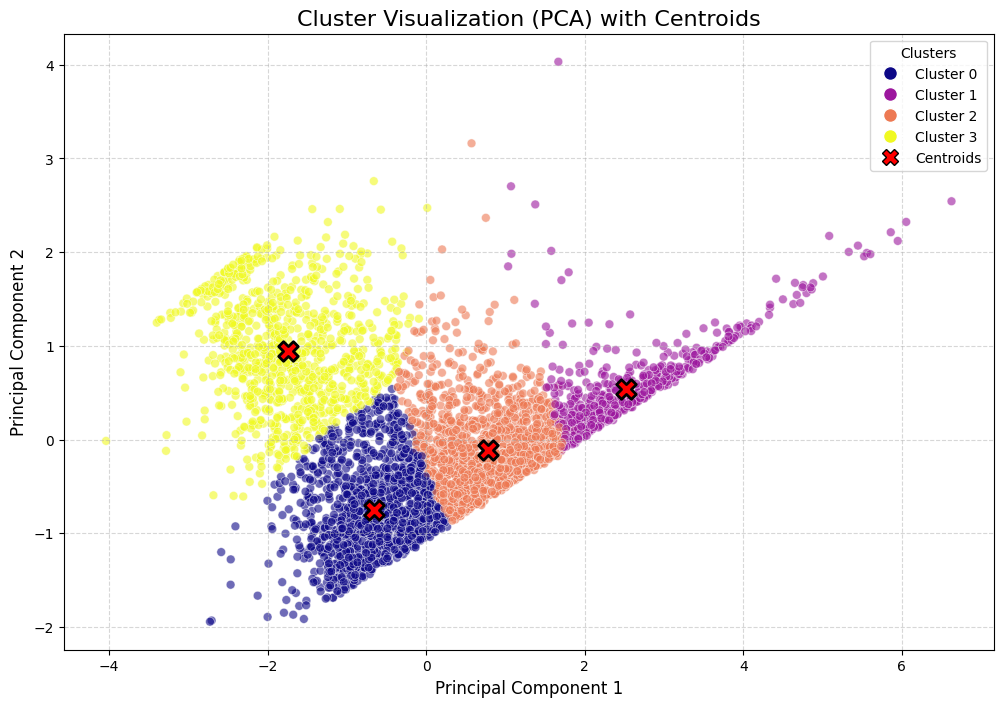

c:\Users\arq_c\Desktop\repo_collabs\ds_projects_collabs\1-cluster_retail_uci\src\viz_functions.py:370: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_means = df_plot.groupby('cluster')[['sale_value', 'frequency', 'recency_days']].mean().reset_index()


Saved interactive charts to:
 - graph_img\mean_sale_value.html
 - graph_img\mean_frequency.html
 - graph_img\mean_recency.html


Saved Boxplots to: graph_img\rfm_boxplots.png


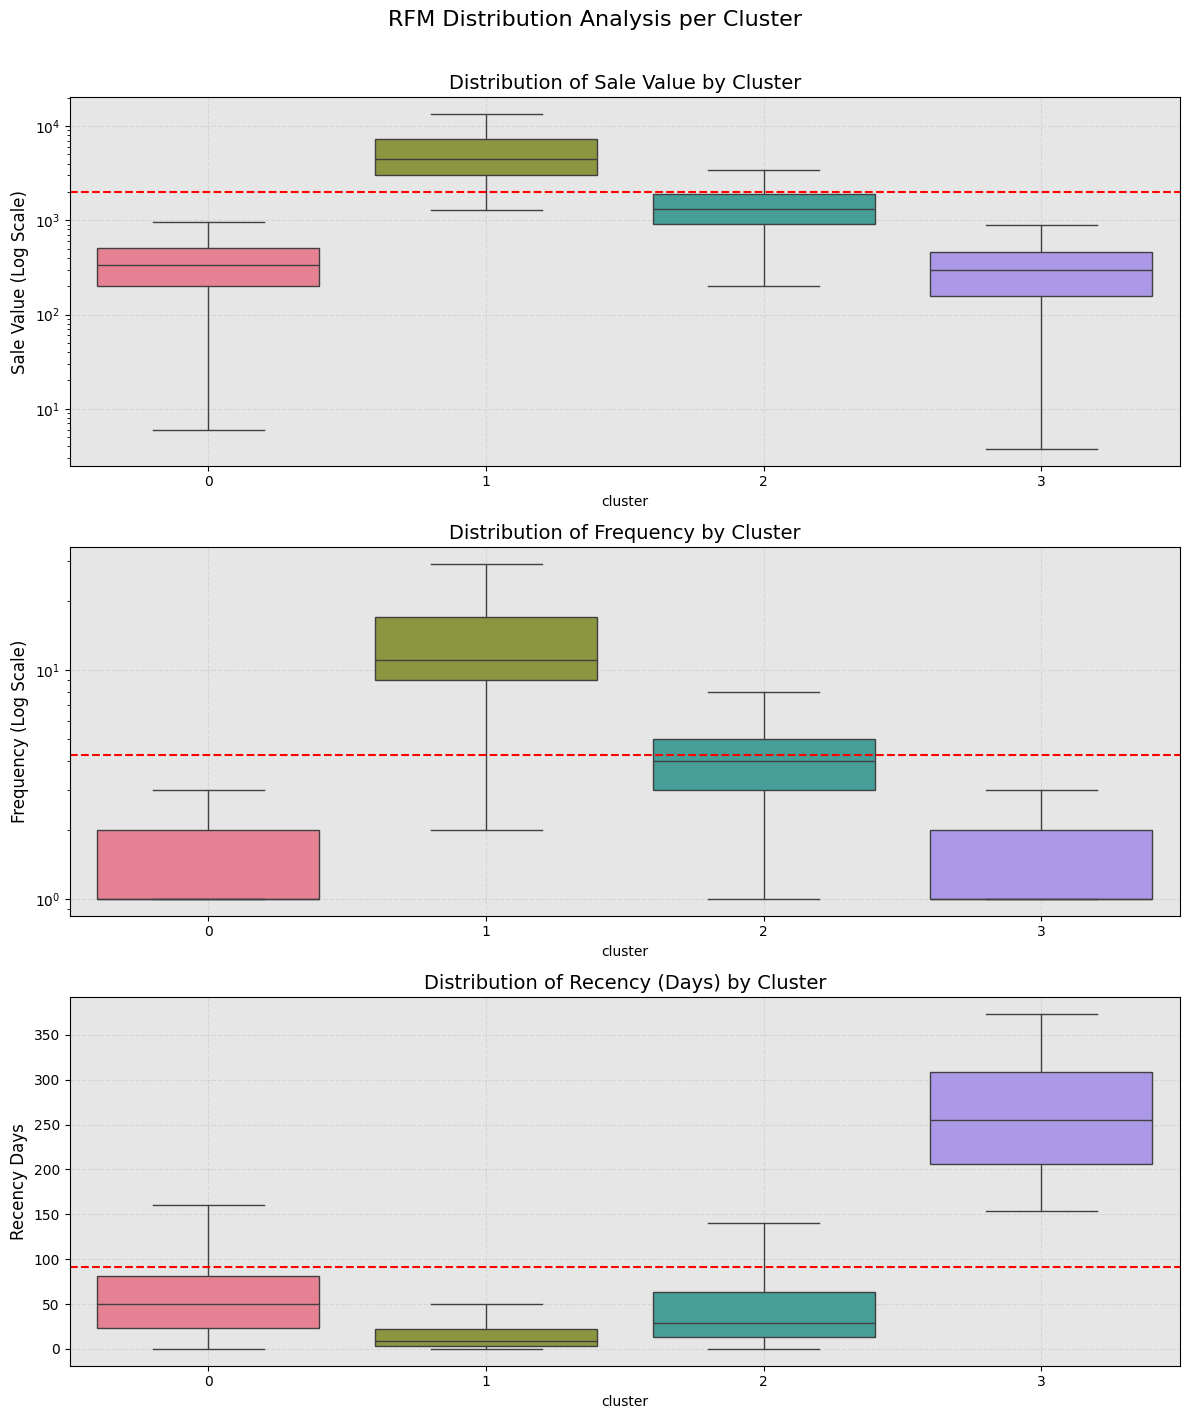

In [13]:
# End-to-end
results = full_clustering_pipeline(
    df_loaded,
    k_range=range(1, 11),
    default_k=4,
    cols_to_scale=["sale_value_log", "frequency_log", "recency_days"],
    cluster_map_names={
        0: "At-Risk Customers",
        1: "Top-Value Customers",
        2: "High-Value Customers",
        3: "Average Customers",
    },
)

df_cluster = results["df_cluster"]
df_real_values = results["df_real_values"]
cluster_desc = results["cluster_desc"]
